**Importing Dataset with Outage Transactions**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/Kill Switch Txns 2022.csv")

In [ ]:
df.head()

,transaction_date,hour,kill_switch_txns
0,01-01-2022,0,2355
1,01-01-2022,1,39241
2,01-01-2022,4,32352
3,01-01-2022,5,17659
4,01-01-2022,8,80690


In [ ]:
df['hour']=df['hour'].astype(str)

In [ ]:
df['Date&Hour']=df['transaction_date']+' '+df['hour']

In [ ]:
from datetime import datetime
df['Date&Hour']=pd.to_datetime(df['Date&Hour'], format="%d-%m-%Y %H")

In [ ]:
df['Year']=df['Date&Hour'].dt.year

In [ ]:
df.head()

,transaction_date,hour,kill_switch_txns,Date&Hour,Year
0,01-01-2022,0,2355,2022-01-01 00:00:00,2022
1,01-01-2022,1,39241,2022-01-01 01:00:00,2022
2,01-01-2022,4,32352,2022-01-01 04:00:00,2022
3,01-01-2022,5,17659,2022-01-01 05:00:00,2022
4,01-01-2022,8,80690,2022-01-01 08:00:00,2022


In [ ]:
df.dtypes

transaction_date            object
hour                        object
kill_switch_txns             int64
Date&Hour           datetime64[ns]
Year                         int64
dtype: object

**Importing Dataset with Google Reviews**

In [ ]:
df2=pd.read_csv("/content/Google App Star Rating 2022.csv")

In [ ]:
df2.head()

,Date&Hour,Star Rating,Language,Year,hour,transaction_date
0,01-01-2022 00,4,11,2022,0,2022-01-01
1,01-01-2022 00,1,11,2022,0,2022-01-01
2,01-01-2022 00,5,11,2022,0,2022-01-01
3,01-01-2022 00,5,11,2022,0,2022-01-01
4,01-01-2022 00,3,11,2022,0,2022-01-01


In [ ]:
df2.tail()

,Date&Hour,Star Rating,Language,Year,hour,transaction_date
547848,22-04-2022 06,5,11,2022,6,2022-04-22
547849,22-04-2022 06,2,11,2022,6,2022-04-22
547850,22-04-2022 06,5,11,2022,6,2022-04-22
547851,22-04-2022 06,4,11,2022,6,2022-04-22
547852,22-04-2022 06,5,11,2022,6,2022-04-22


In [ ]:
df2.rename({'Review Submit Date and Time': 'date'}, axis=1, inplace=True)

In [ ]:
dfs1=df.loc[df['Year']==2022]

In [ ]:
df2.head()

,Date&Hour,Star Rating,Language,Year,hour,transaction_date
0,01-01-2022 00,4,11,2022,0,2022-01-01
1,01-01-2022 00,1,11,2022,0,2022-01-01
2,01-01-2022 00,5,11,2022,0,2022-01-01
3,01-01-2022 00,5,11,2022,0,2022-01-01
4,01-01-2022 00,3,11,2022,0,2022-01-01


In [ ]:
df2.dtypes

Date&Hour           object
Star Rating          int64
Language             int64
Year                 int64
hour                 int64
transaction_date    object
dtype: object

In [ ]:
df2['Date&Hour']=pd.to_datetime(df2['Date&Hour'], format="%d-%m-%Y %H")

In [ ]:
dfm=pd.merge(dfs1, df2, on=['Date&Hour'], how='left')
dfm.head()

,transaction_date_x,hour_x,kill_switch_txns,Date&Hour,Year_x,Star Rating,Language,Year_y,hour_y,transaction_date_y
0,01-01-2022,0,2355,2022-01-01,2022,4,11,2022,0,2022-01-01
1,01-01-2022,0,2355,2022-01-01,2022,1,11,2022,0,2022-01-01
2,01-01-2022,0,2355,2022-01-01,2022,5,11,2022,0,2022-01-01
3,01-01-2022,0,2355,2022-01-01,2022,5,11,2022,0,2022-01-01
4,01-01-2022,0,2355,2022-01-01,2022,3,11,2022,0,2022-01-01


In [ ]:
df2.dtypes

Date&Hour           datetime64[ns]
Star Rating                  int64
Language                     int64
Year                         int64
hour                         int64
transaction_date            object
dtype: object

In [ ]:
df2['Date&Hour']=pd.to_datetime(df2['Date&Hour'], format="%d-%m-%Y %H")

In [ ]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390943 entries, 0 to 390942
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   transaction_date_x  390943 non-null  object        
 1   hour_x              390943 non-null  object        
 2   kill_switch_txns    390943 non-null  int64         
 3   Date&Hour           390943 non-null  datetime64[ns]
 4   Year_x              390943 non-null  int64         
 5   Star Rating         390943 non-null  int64         
 6   Language            390943 non-null  int64         
 7   Year_y              390943 non-null  int64         
 8   hour_y              390943 non-null  int64         
 9   transaction_date_y  390943 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 32.8+ MB


In [ ]:
dfm['Month']=dfm['Date&Hour'].dt.month
dfm['Day']=dfm['Date&Hour'].dt.day

**Understanding Dataset**

In [ ]:
dfm.head()

,transaction_date_x,hour_x,kill_switch_txns,Date&Hour,Year_x,Star Rating,Language,Year_y,hour_y,transaction_date_y,Month,Day
0,01-01-2022,0,2355,2022-01-01,2022,4,11,2022,0,2022-01-01,1,1
1,01-01-2022,0,2355,2022-01-01,2022,1,11,2022,0,2022-01-01,1,1
2,01-01-2022,0,2355,2022-01-01,2022,5,11,2022,0,2022-01-01,1,1
3,01-01-2022,0,2355,2022-01-01,2022,5,11,2022,0,2022-01-01,1,1
4,01-01-2022,0,2355,2022-01-01,2022,3,11,2022,0,2022-01-01,1,1


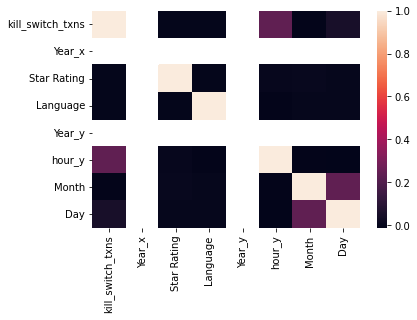

In [ ]:
import seaborn as sns
dataplot=sns.heatmap(dfm.corr())
plt.show()

In [ ]:
dfm['hour_x'].unique()

In [ ]:
dfs=dfm.loc[dfm['transaction_date_x']== "01-01-2022"]
dfs.head()

,transaction_date_x,hour_x,kill_switch_txns,Date&Hour,Year_x,Star Rating,Language,Year_y,hour_y,transaction_date_y,Month,Day
0,01-01-2022,0,2355,2022-01-01,2022,4,11,2022,0,2022-01-01,1,1
1,01-01-2022,0,2355,2022-01-01,2022,1,11,2022,0,2022-01-01,1,1
2,01-01-2022,0,2355,2022-01-01,2022,5,11,2022,0,2022-01-01,1,1
3,01-01-2022,0,2355,2022-01-01,2022,5,11,2022,0,2022-01-01,1,1
4,01-01-2022,0,2355,2022-01-01,2022,3,11,2022,0,2022-01-01,1,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



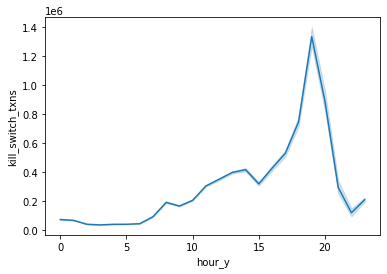

In [ ]:
sns.lineplot('hour_y', 'kill_switch_txns', data=dfm, sort=True)

In [ ]:
dfm.dtypes

transaction_date_x            object
hour_x                        object
kill_switch_txns               int64
Date&Hour             datetime64[ns]
Year_x                         int64
Star Rating                    int64
Language                       int64
Year_y                         int64
hour_y                         int64
transaction_date_y            object
Month                          int64
Day                            int64
dtype: object

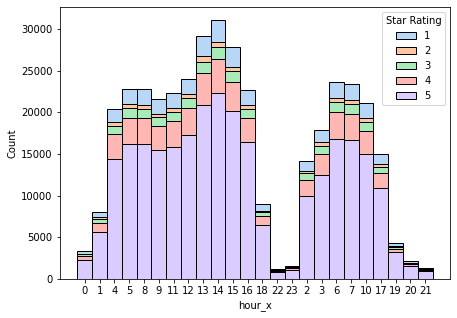

In [ ]:
#stacked bar chart
f=plt.figure(figsize=(7,5))
ax=f.add_subplot(1,1,1)
sns.histplot(data=dfm, ax=ax, stat="count", multiple="stack", x="hour_x", 
             kde=False, palette="pastel", hue="Star Rating", element="bars", legend=True)

In [ ]:
dff=dfm.groupby(['Date&Hour'])['Star Rating'].count().reset_index()

In [ ]:
print(type(dff))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
dff.head()

,Date&Hour,Star Rating
0,2022-01-01 00:00:00,39
1,2022-01-01 01:00:00,83
2,2022-01-01 02:00:00,141
3,2022-01-01 03:00:00,227
4,2022-01-01 04:00:00,263


In [ ]:
import plotly.express as px
fig=px.line(dff, x='Date&Hour', y='Star Rating', title='Star Rating with Slider')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
dff['Date&Hour']=pd.to_datetime(dff['Date&Hour'], format="%d-%m-%Y %H")
dff.set_index('Date&Hour', inplace=True)
dff= dff.asfreq(freq='h')
dff = dff.fillna(method='bfill').fillna(method='ffill')

Text(0.5, 0.98, 'Additive Decompose')

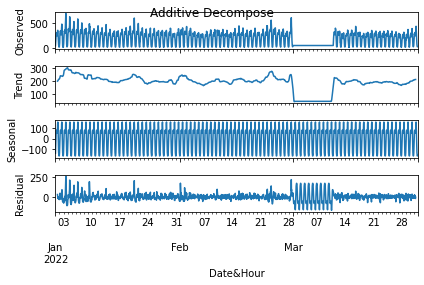

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
# Additive Decomposition
result_add = seasonal_decompose(dff['Star Rating'], model='additive')
# Plot
result_add.plot().suptitle('Additive Decompose')

Text(0.5, 0.98, 'Multiplicative Decompose')

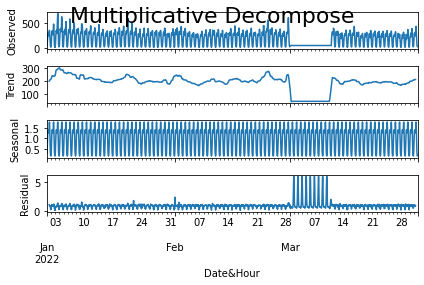

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
# Additive Decomposition
result_add = seasonal_decompose(dff['Star Rating'], model='multiplicative')
# Plot
result_add.plot().suptitle('Multiplicative Decompose', fontsize=22)

In [ ]:
#get dummies to check individual ratings

**Checking Stationarity**

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(dff['Star Rating'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] > 0.05:
    print('Series is not Stationary')
else:
    print('Series is Stationary')


# KPSS Test
stats, p, lags, critical_values = kpss(dff['Star Rating'], 'ct')
print(f'KPSS Test Statistics: {stats}')
print(f'p-value: {p}')

if p<0.05:
      print('Series is not Stationary')
else:
      print('Series is Stationary')

ADF Statistic: -3.0753246158891994
p-value: 0.02843399242602672
Series is Stationary
KPSS Test Statistics: 0.2982711493775768
p-value: 0.01
Series is not Stationary


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning:

p-value is smaller than the indicated p-value

